In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Create the output directory if it doesn't exist
output_dir = "Overlaid_Importance"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

def adjust_and_plot(window_size):
    # Construct file paths
    xgb_file = f"XGB_Position_Importance_Values/feature_importances_window_{window_size}.csv"
    pos_imp_file = f"position_importance_folder/pos_imp{window_size}.csv"
    
    # Read XGB data
    xgb_data = pd.read_csv(xgb_file)
    
    # Read and adjust position importance folder data
    pos_imp_data = pd.read_csv(pos_imp_file, header=0, names=['Index', 'Position', 'Importance:'])
    pos_imp_data['Adjusted Position'] = pos_imp_data['Position'] - (90 + window_size / 2)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(xgb_data['Position'], xgb_data['Importance'], color='blue', label='XGB', alpha=0.6)
    plt.bar(pos_imp_data['Adjusted Position'], pos_imp_data['Importance:'], color='red', label='RF', alpha=0.6)
    plt.title(f'Position Importance Values for Window Size {window_size}')
    plt.xlabel('Position')
    plt.ylabel('Importance')
    plt.legend()
    plt.savefig(f"Overlaid_Importance/Overlaid_Importance_{window_size}.png")
    plt.close()

# Loop through all window sizes
for window_size in range(2, 51):
    adjust_and_plot(window_size)


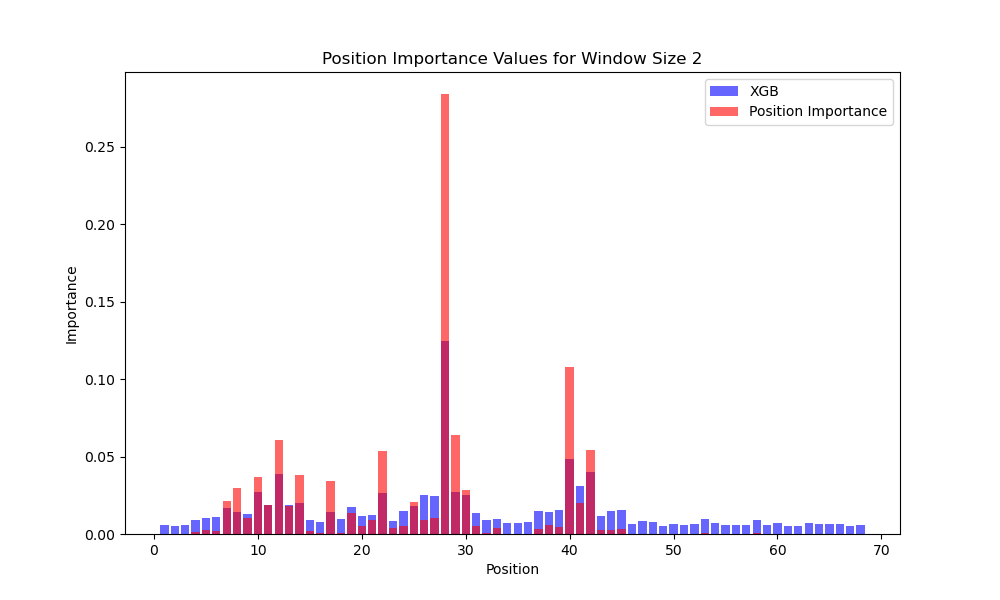

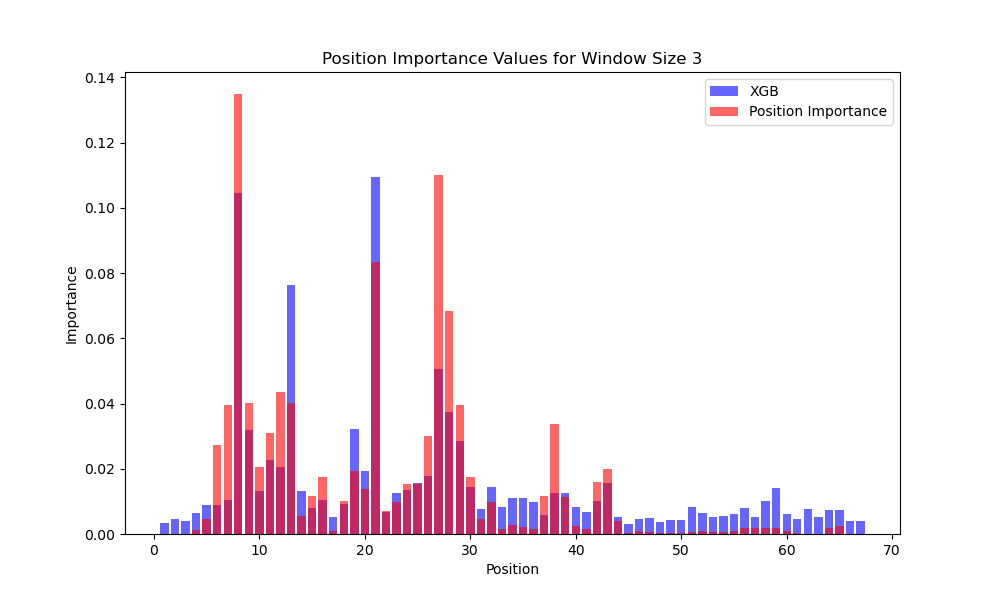

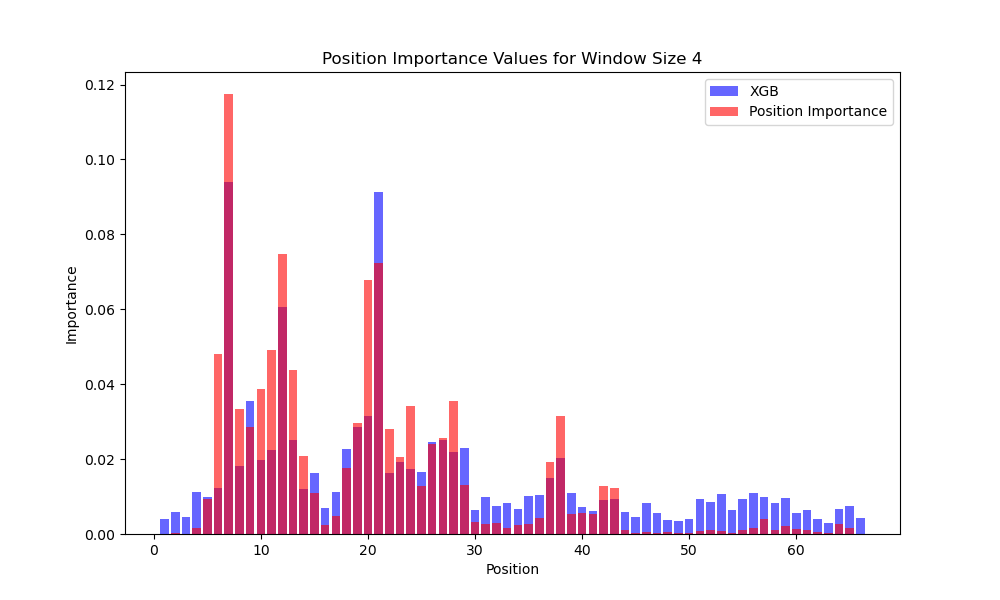

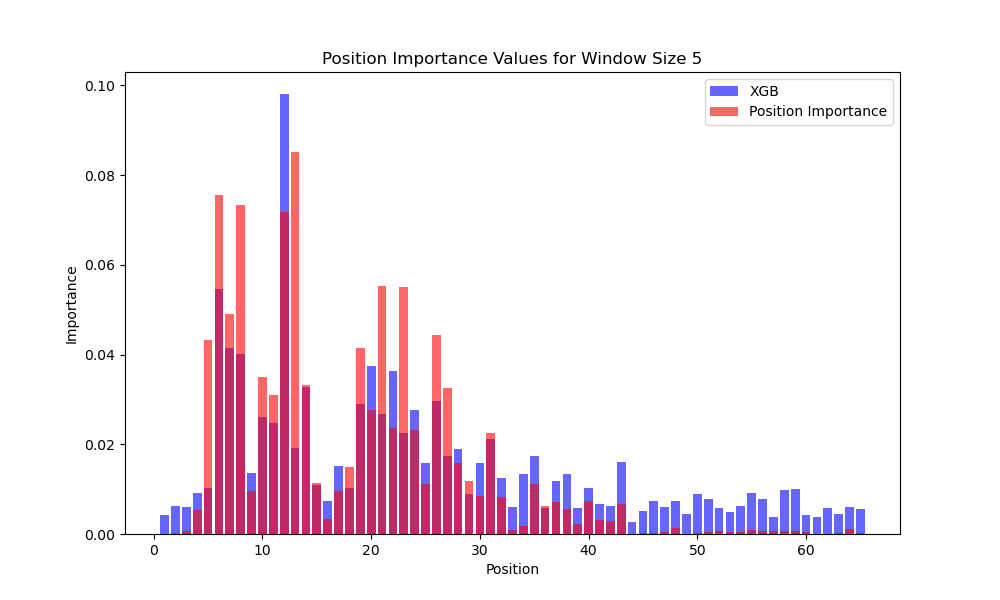

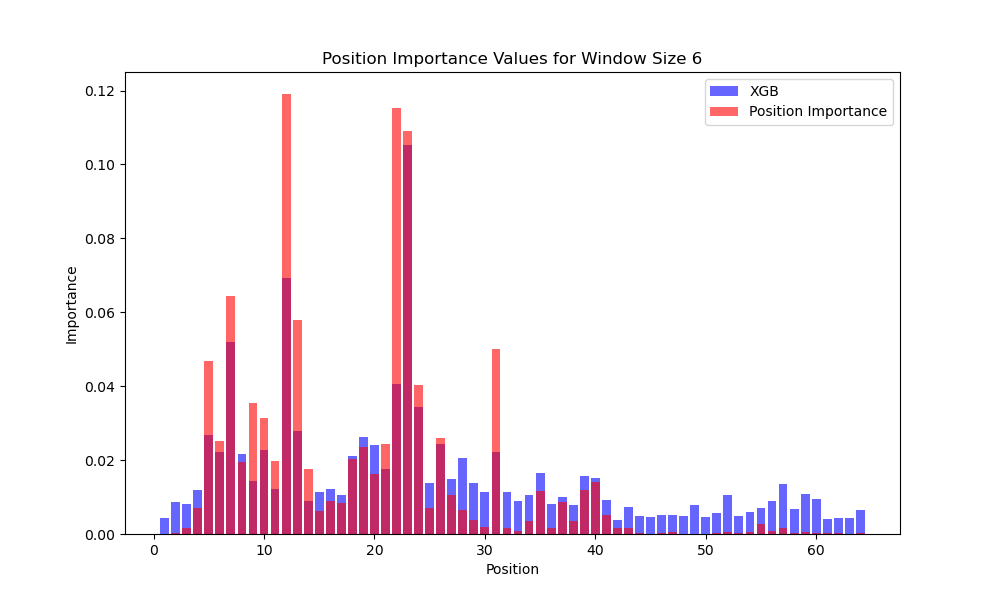

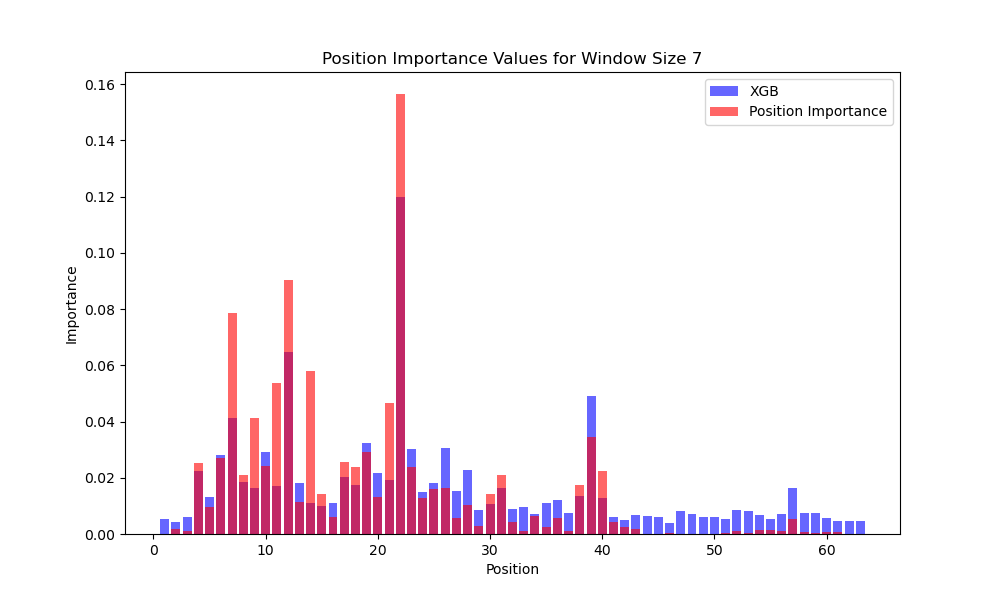

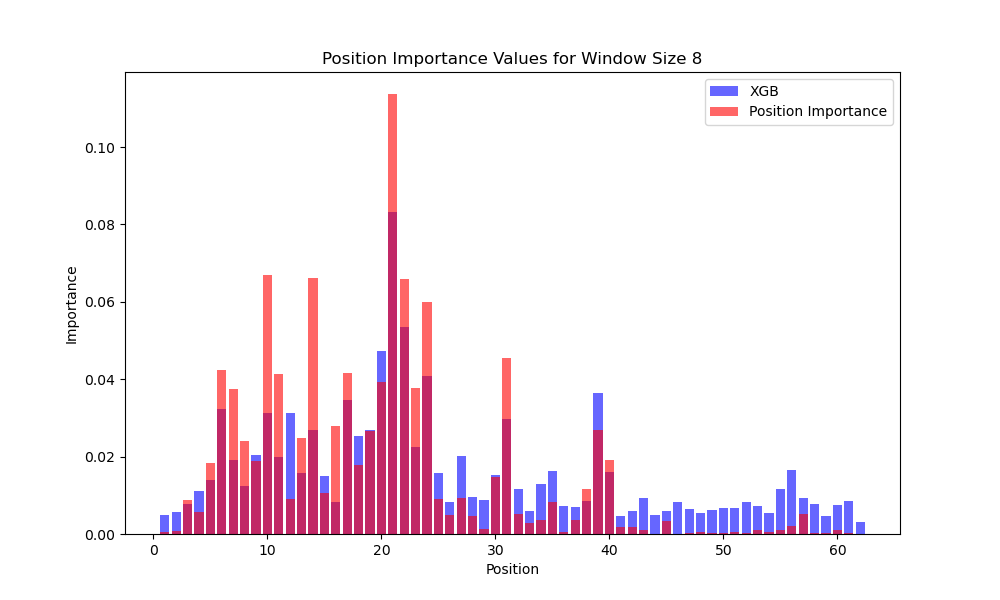

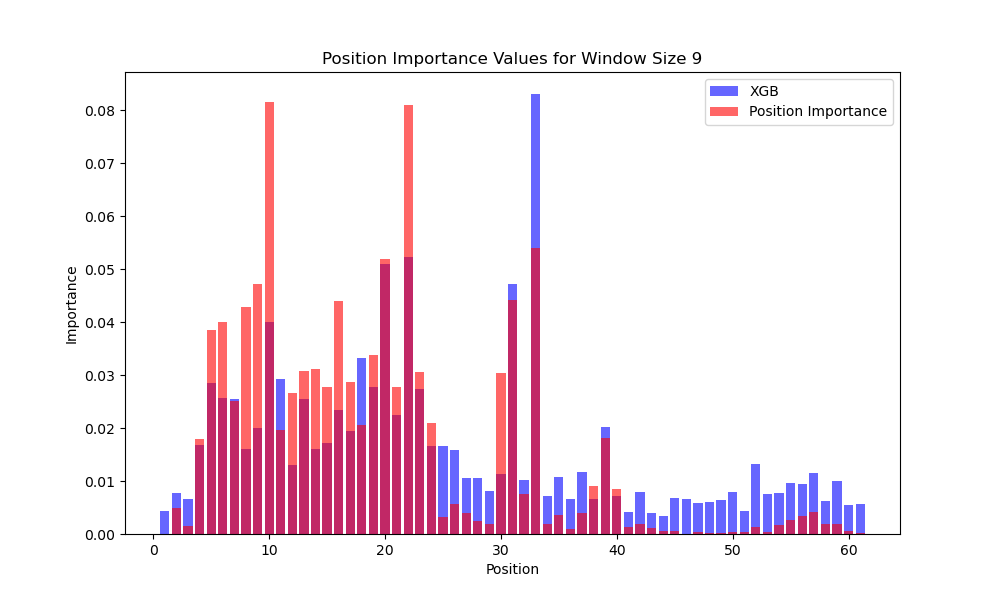

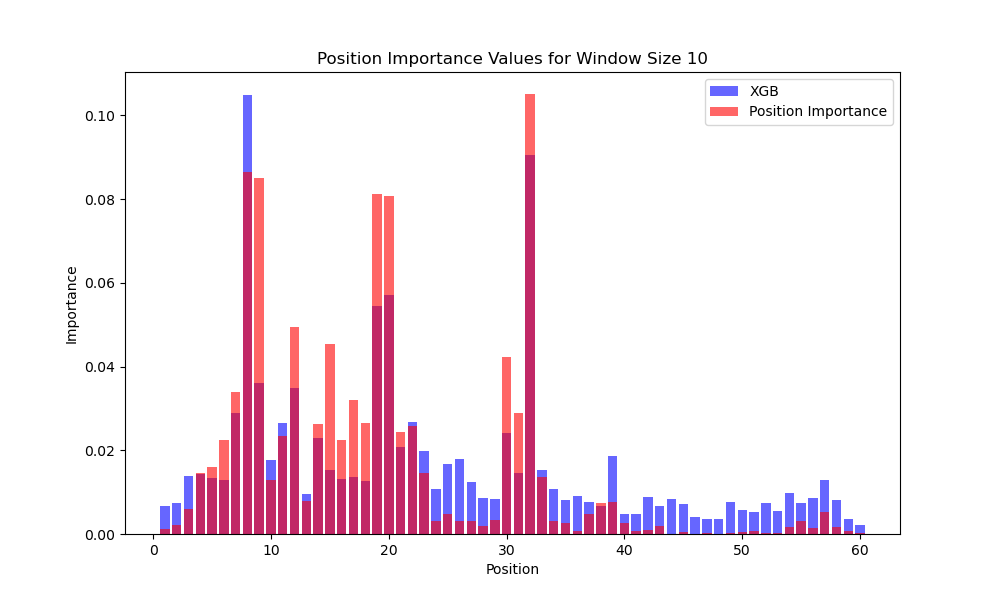

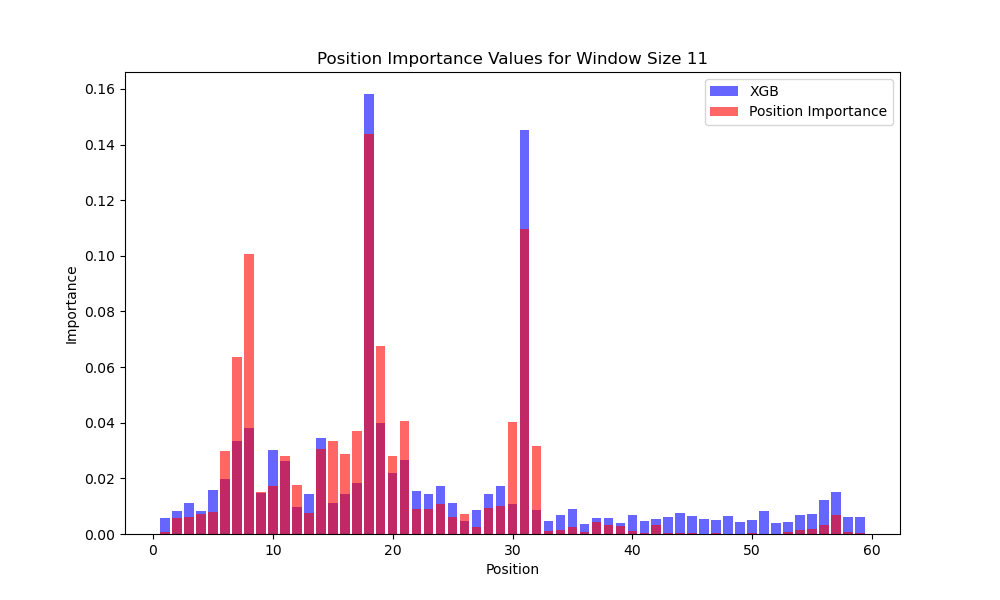

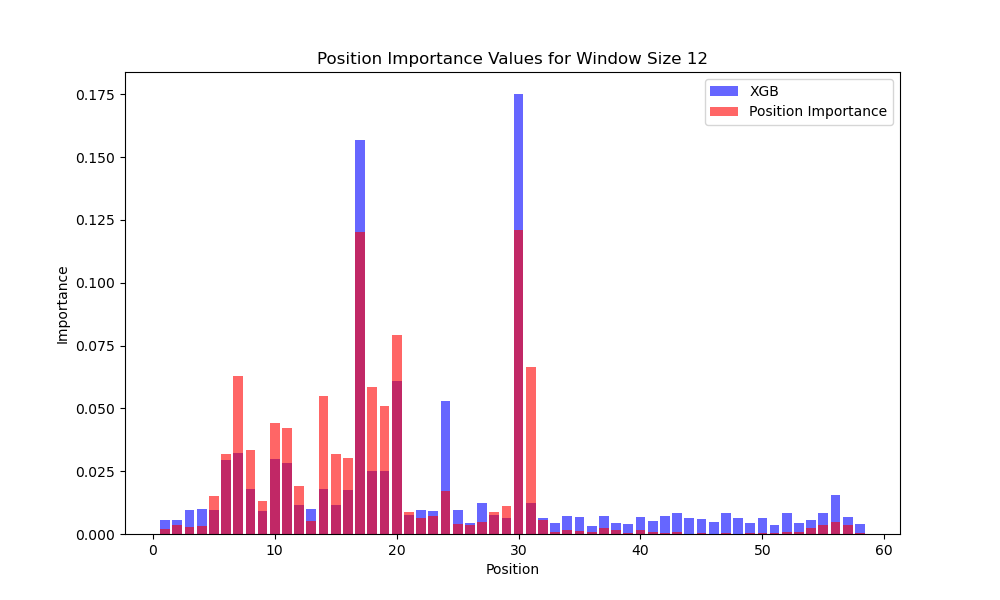

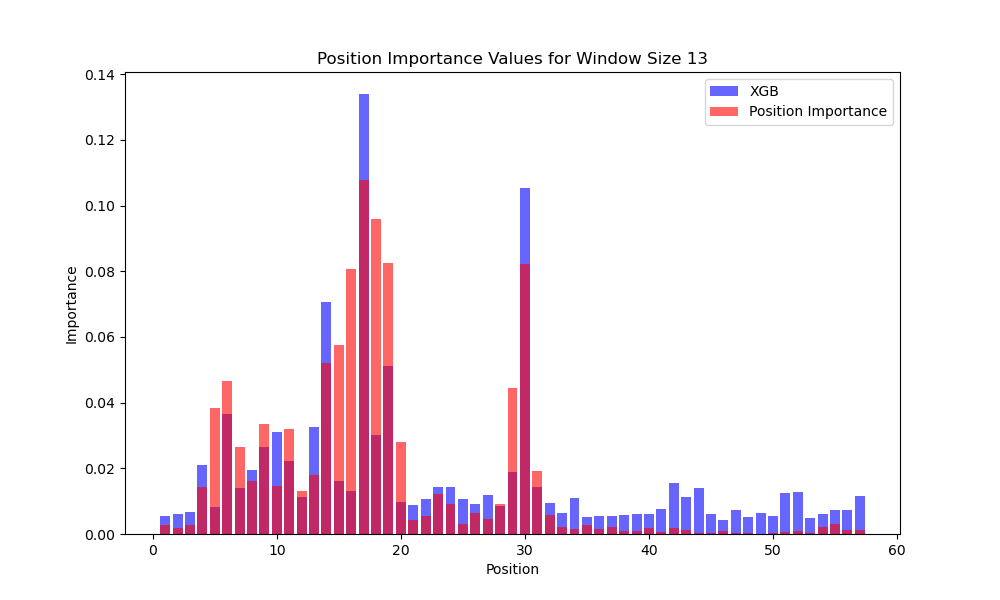

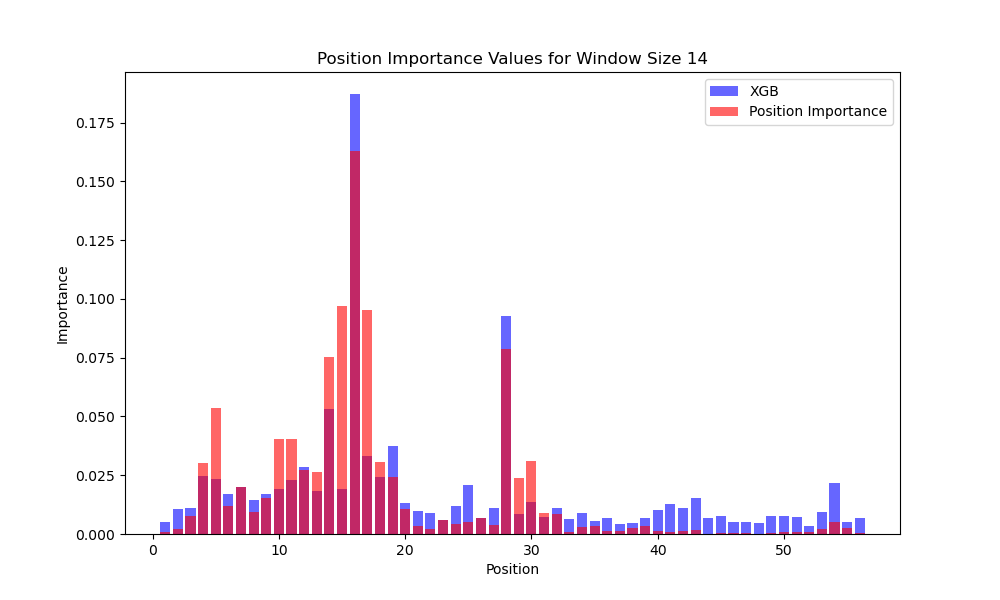

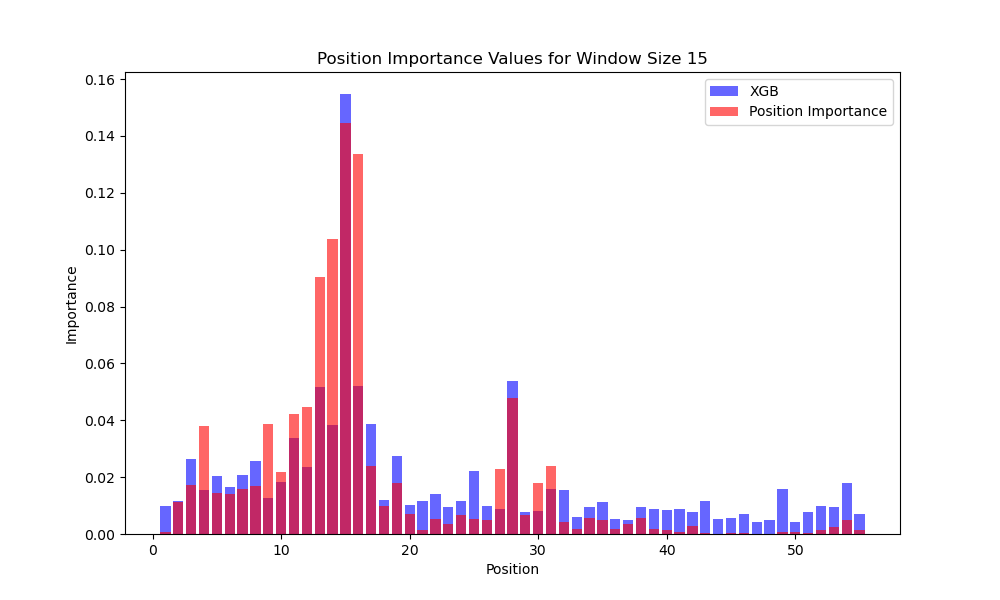

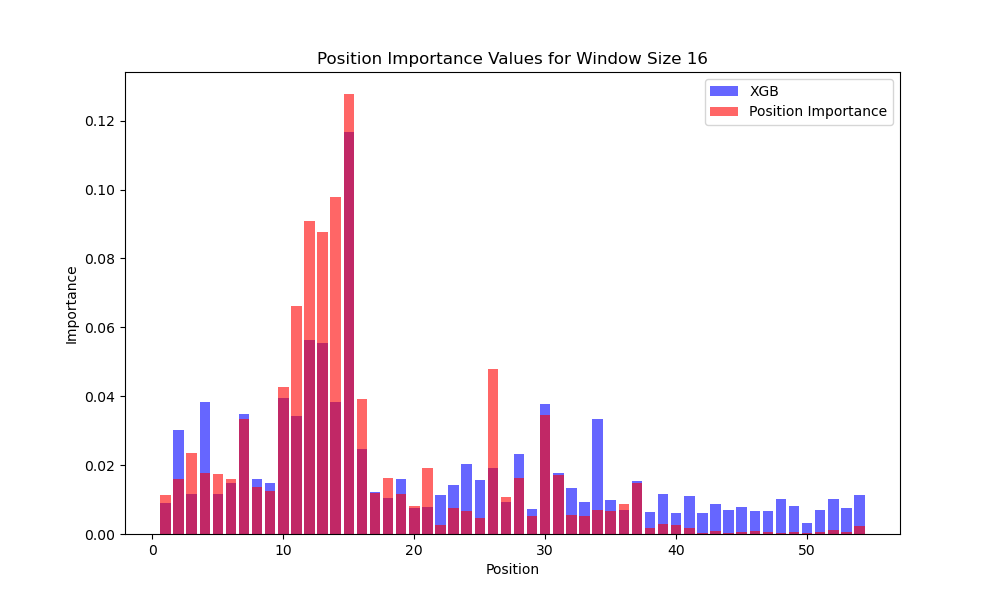

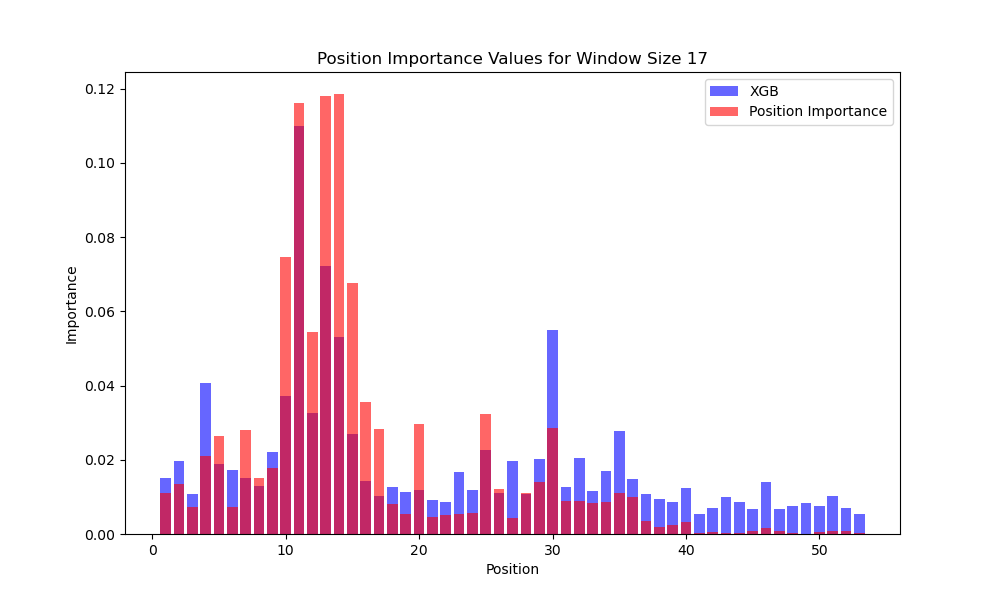

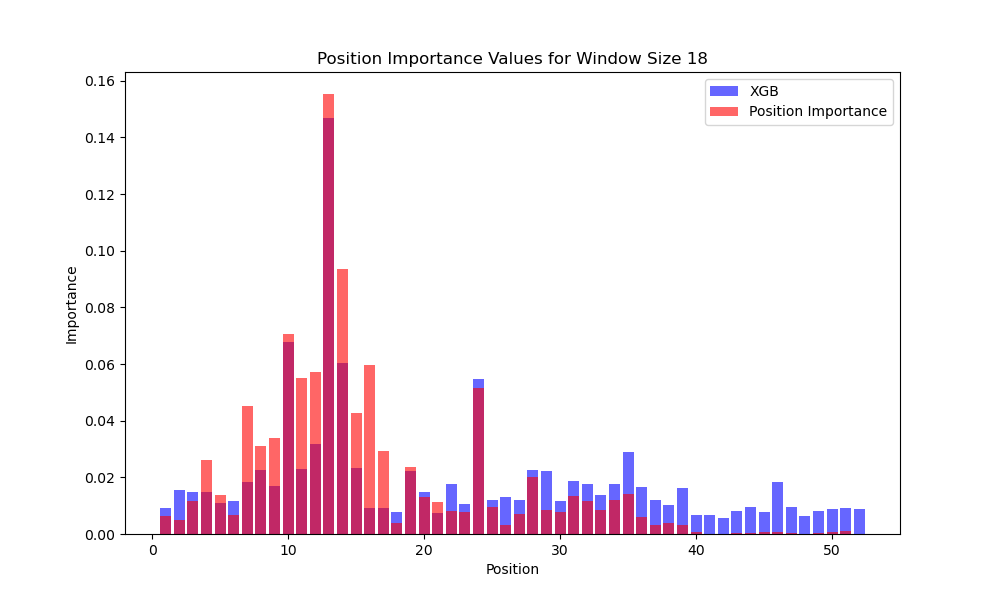

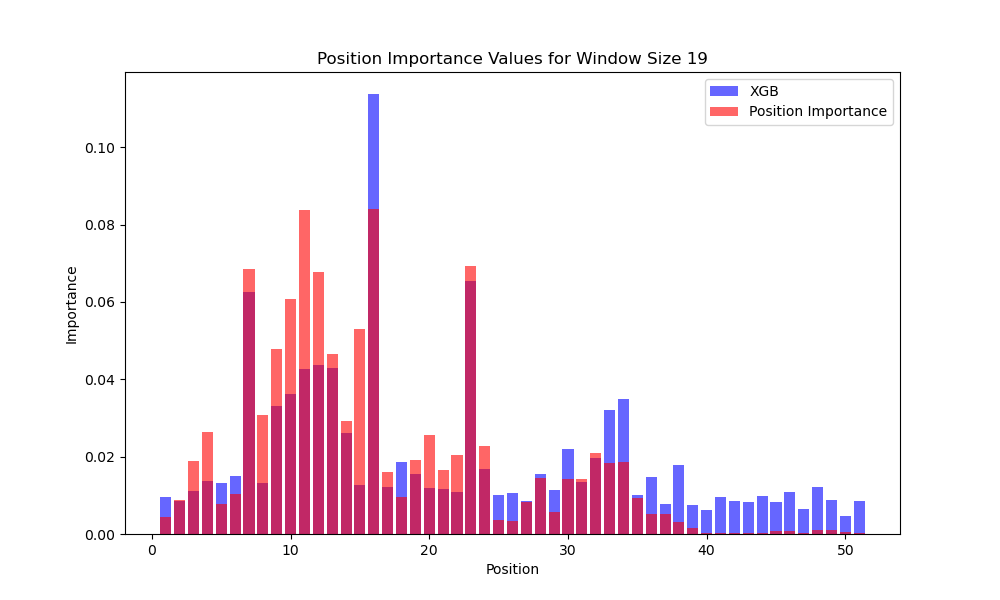

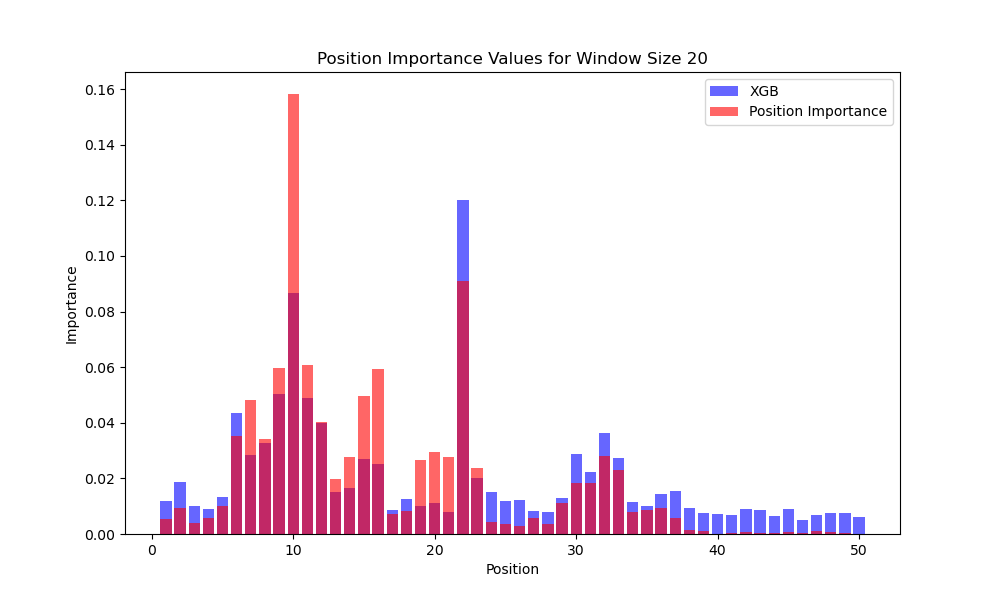

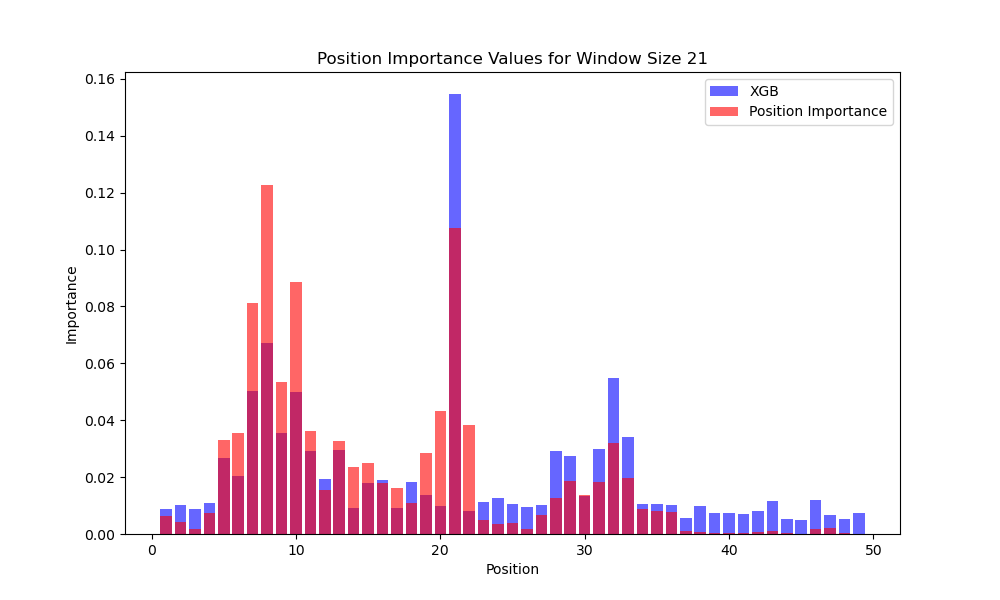

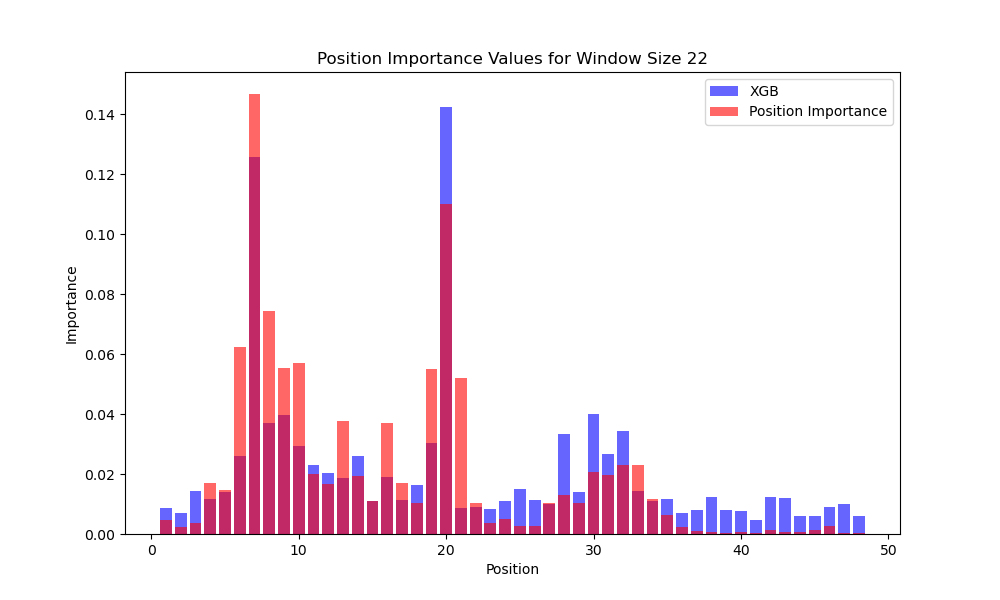

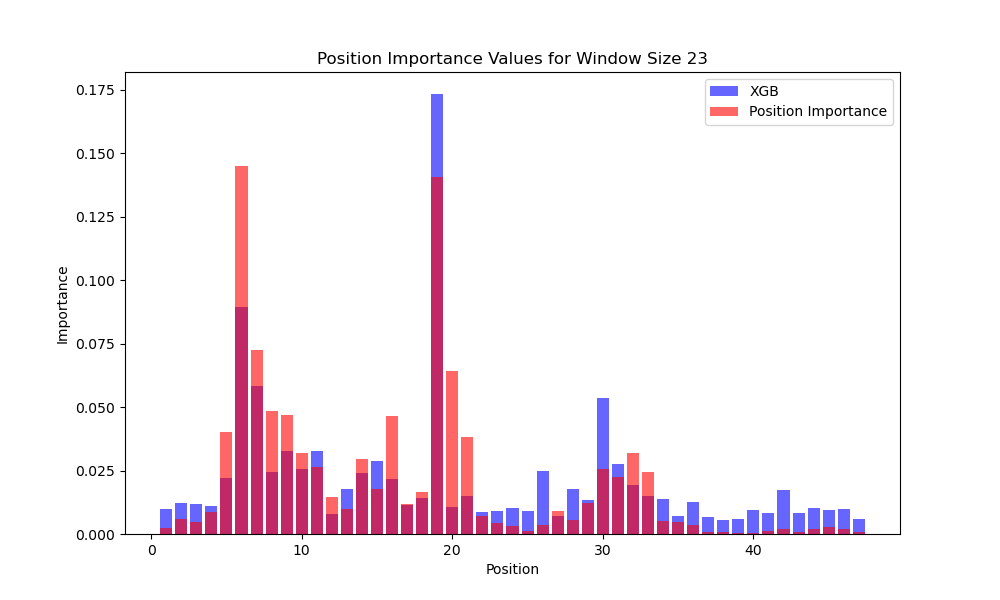

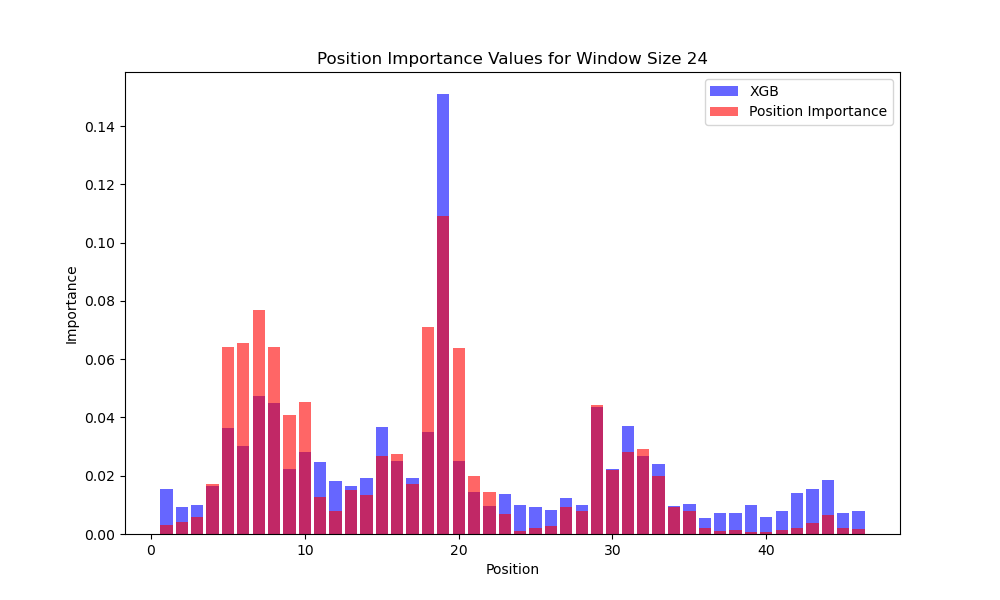

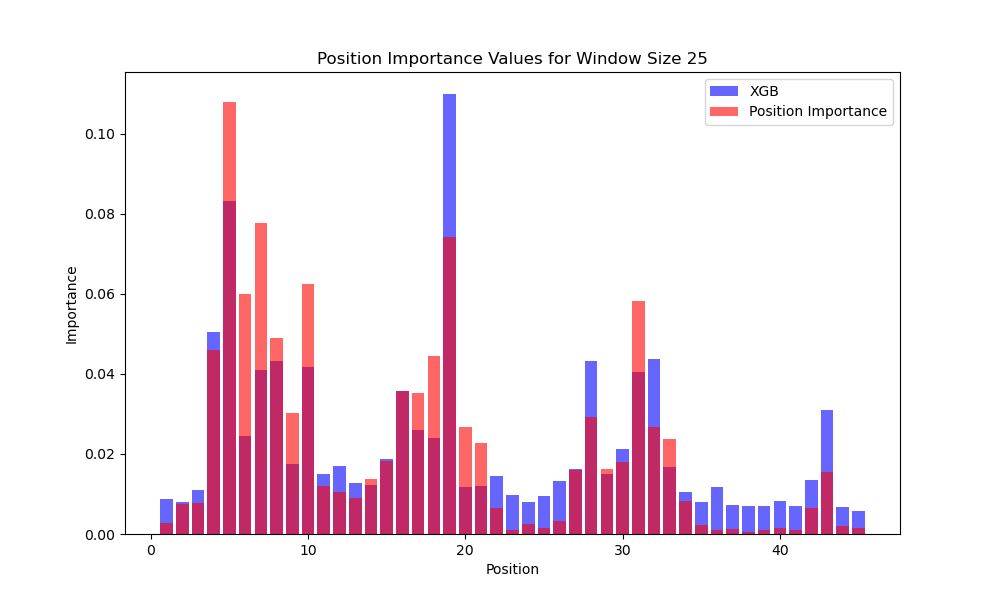

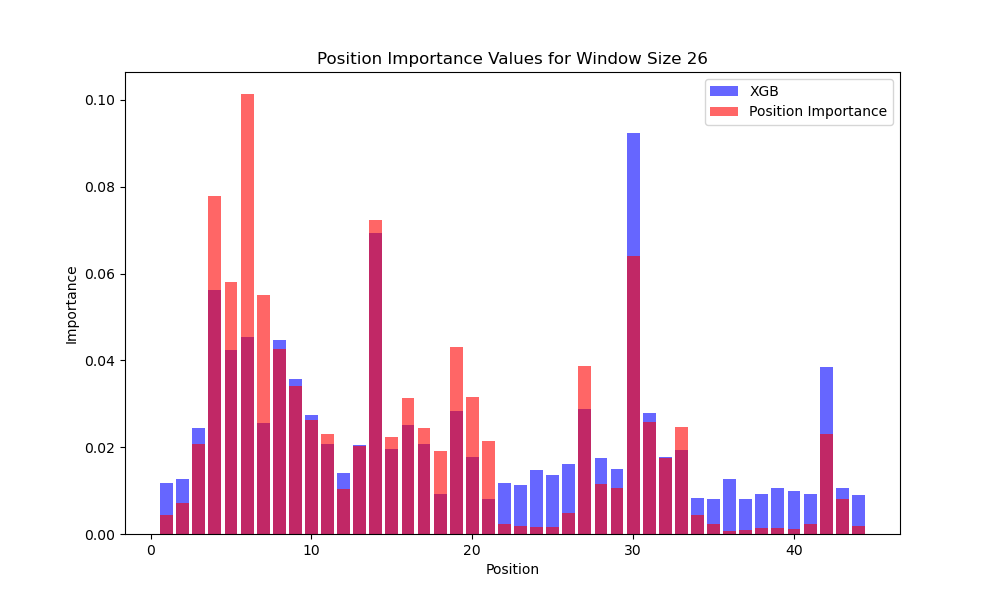

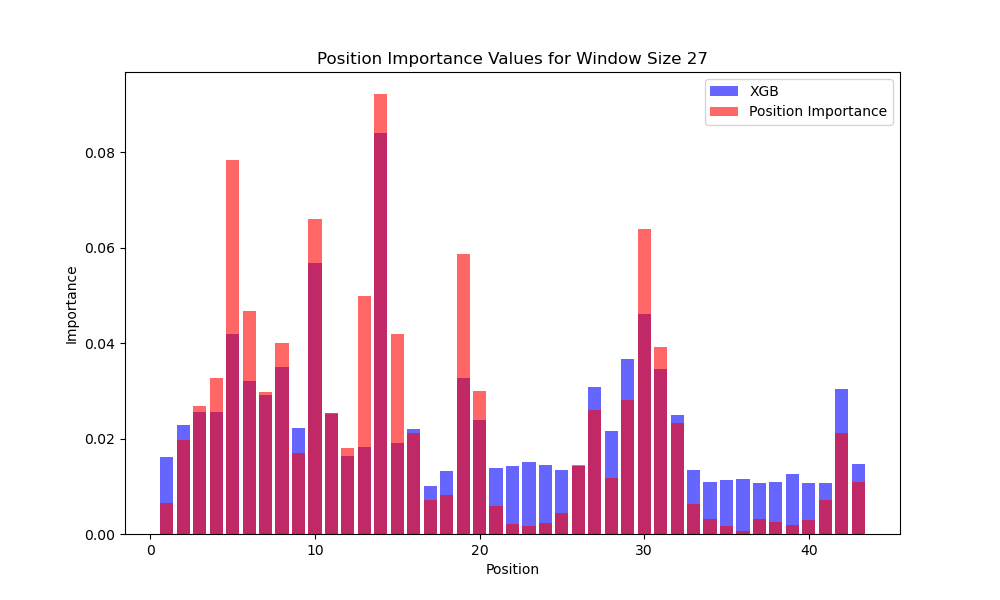

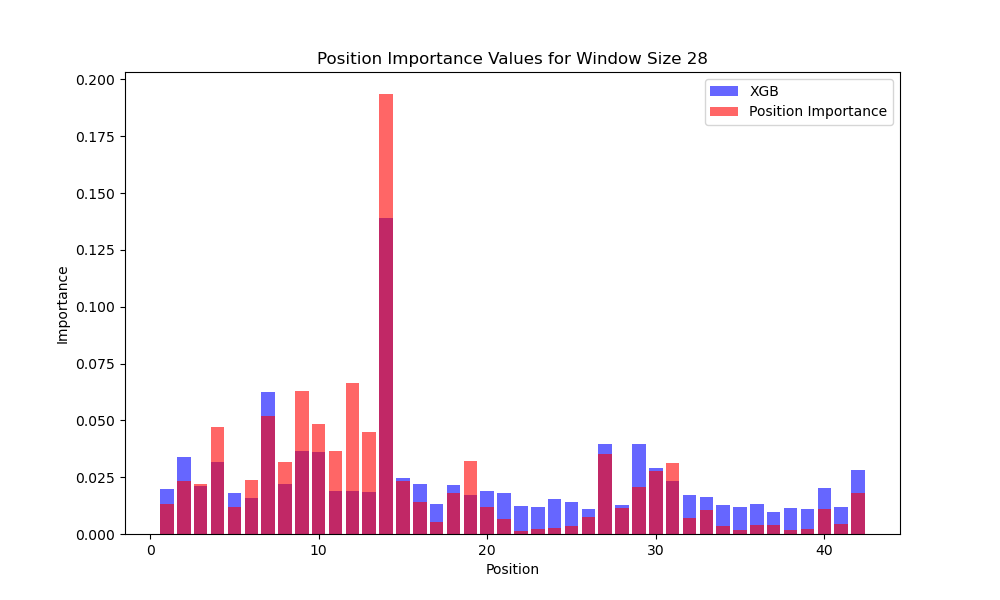

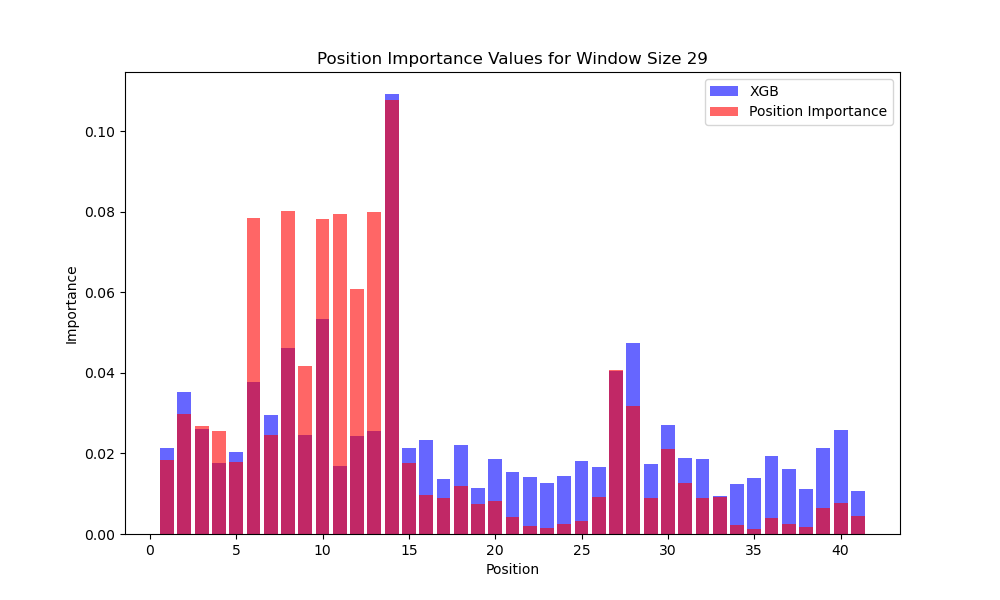

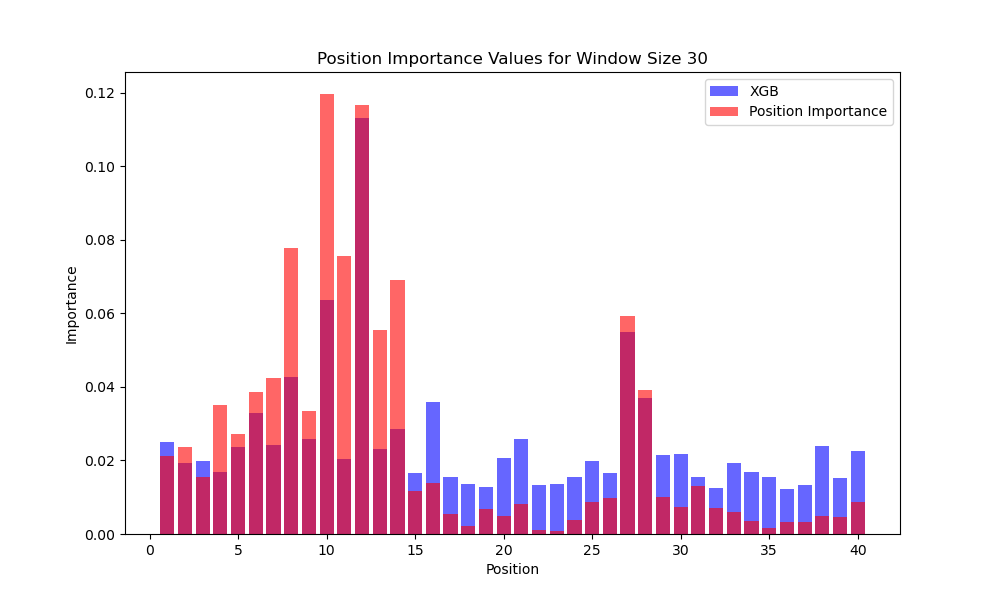

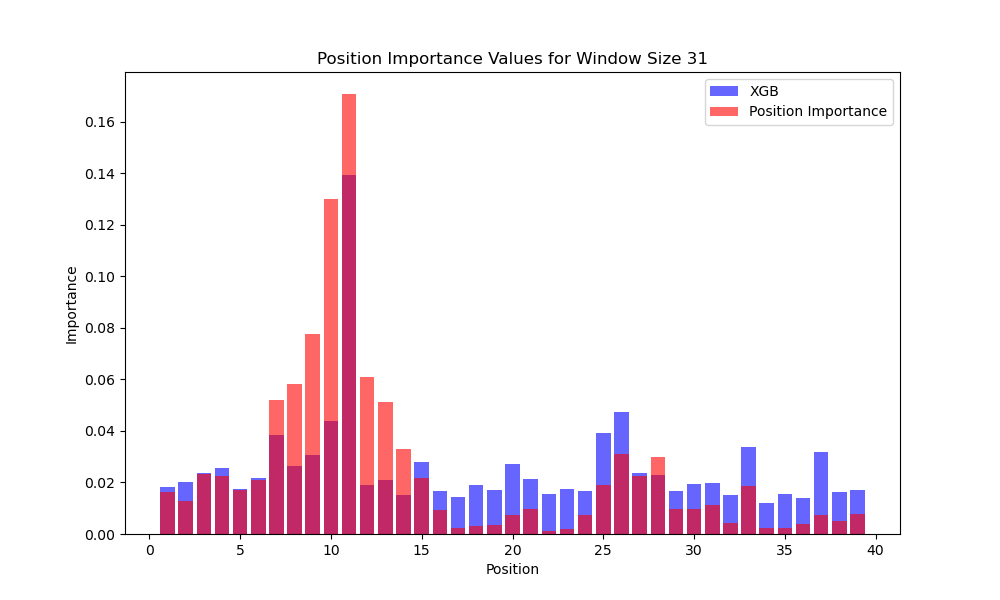

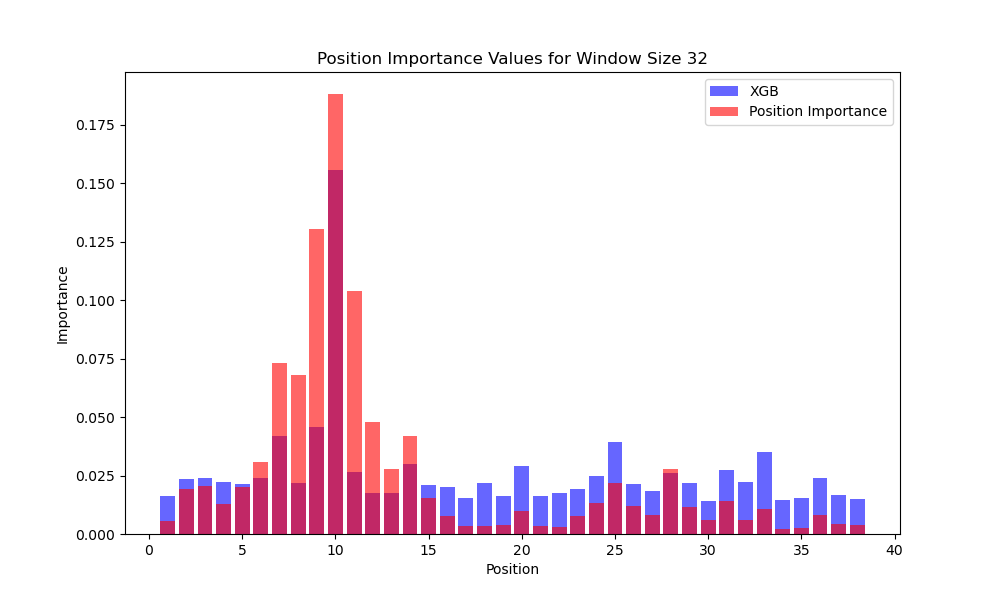

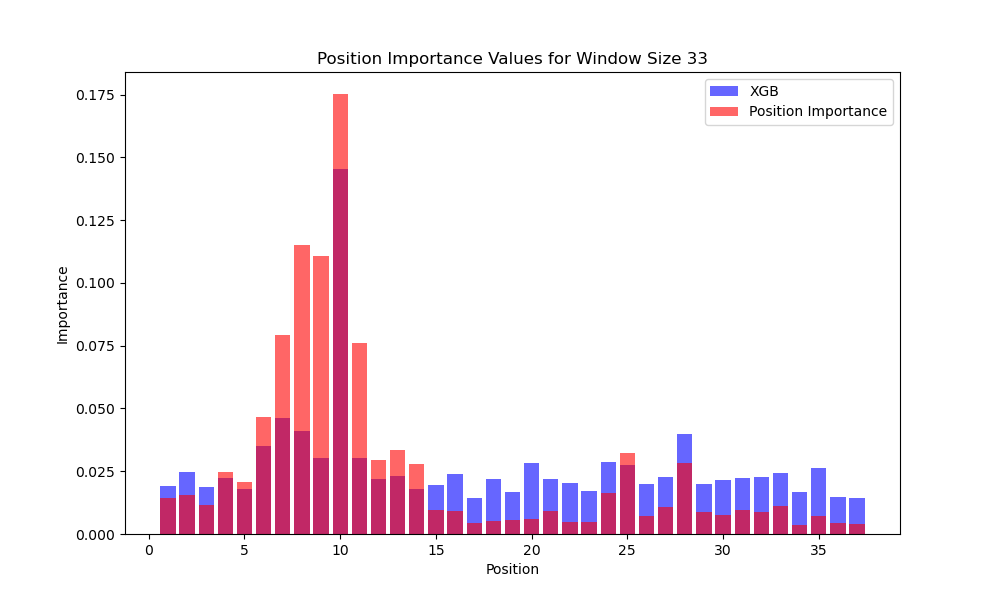

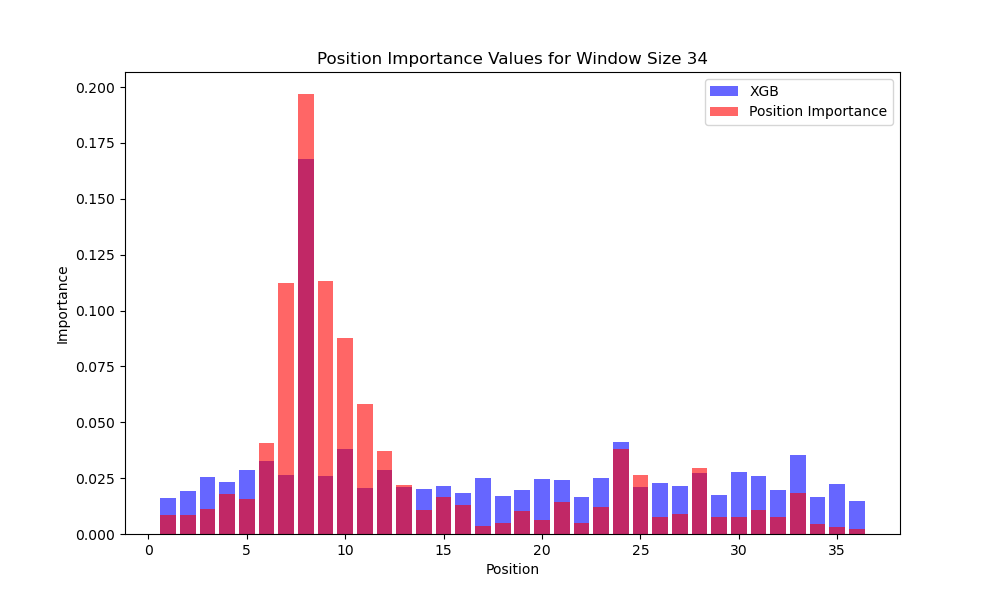

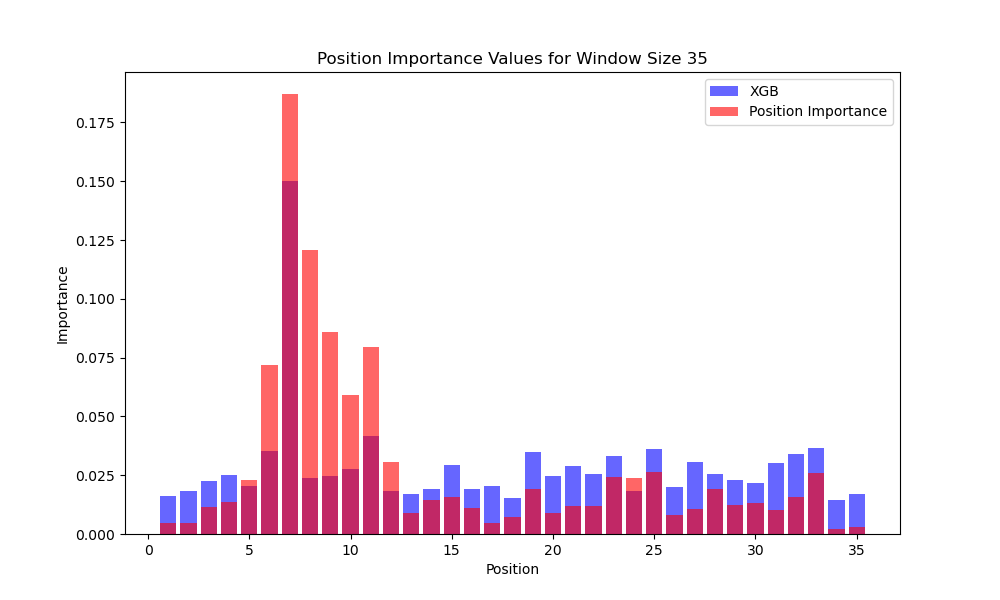

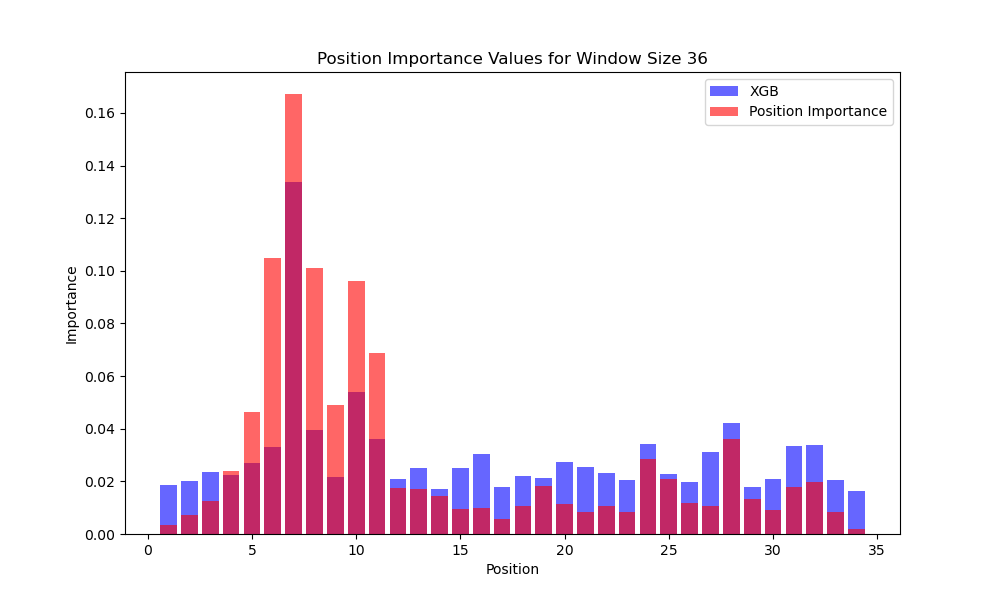

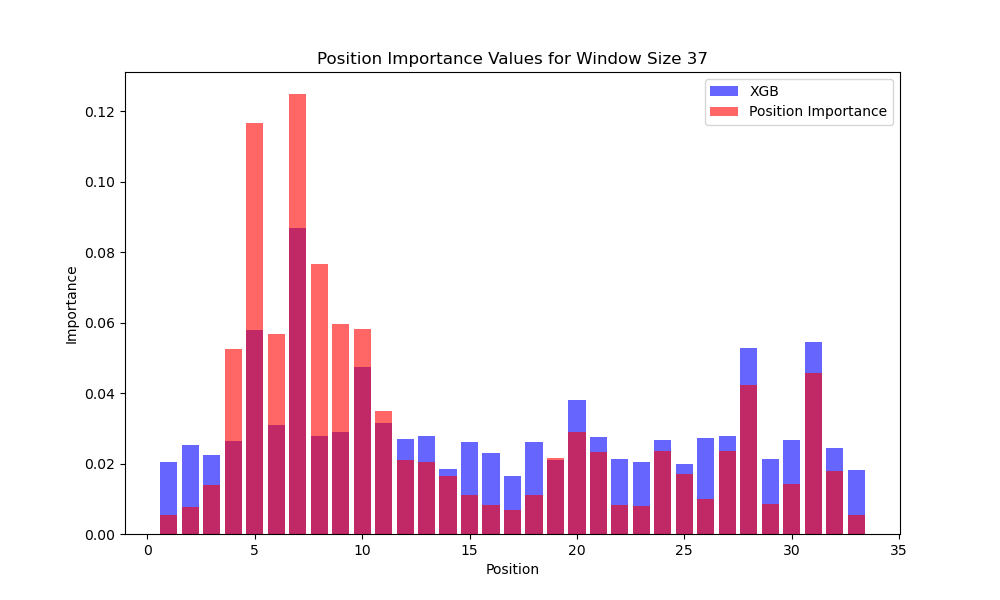

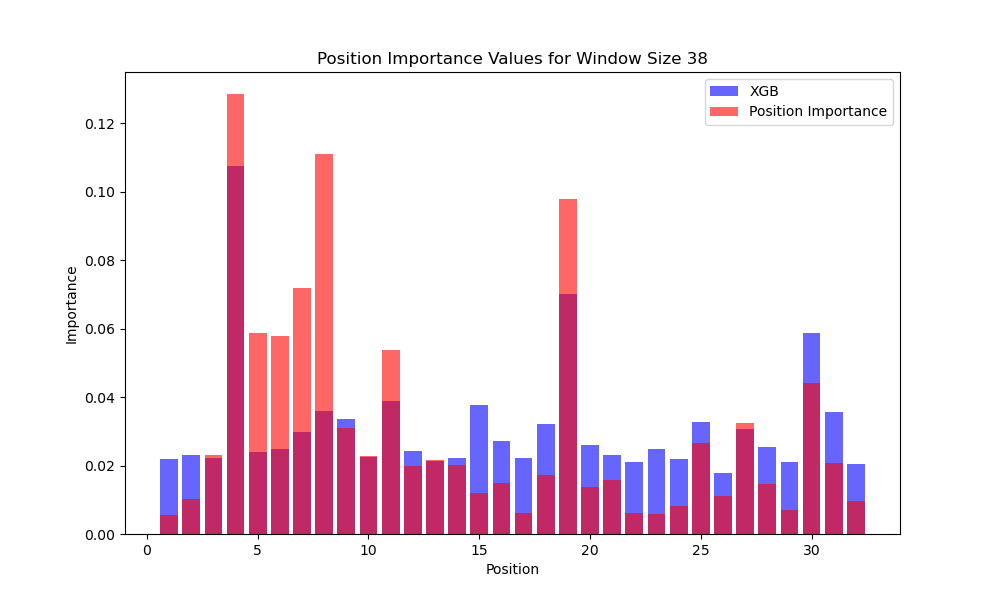

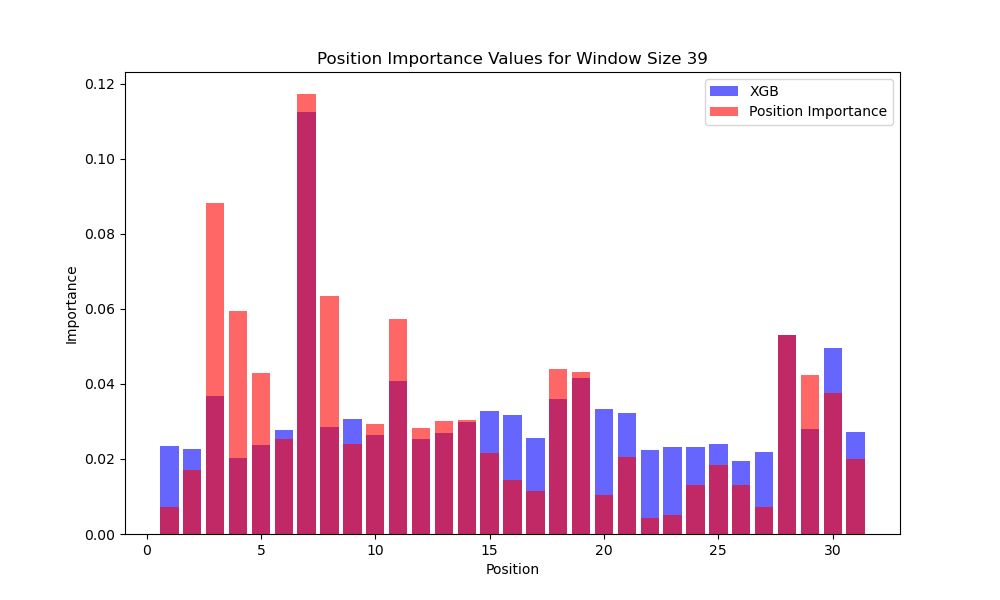

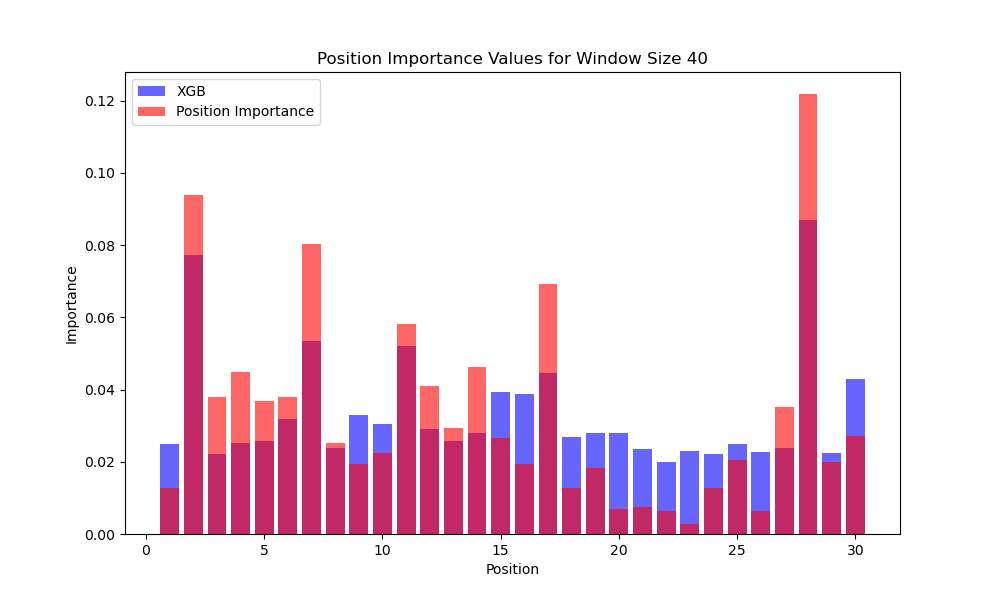

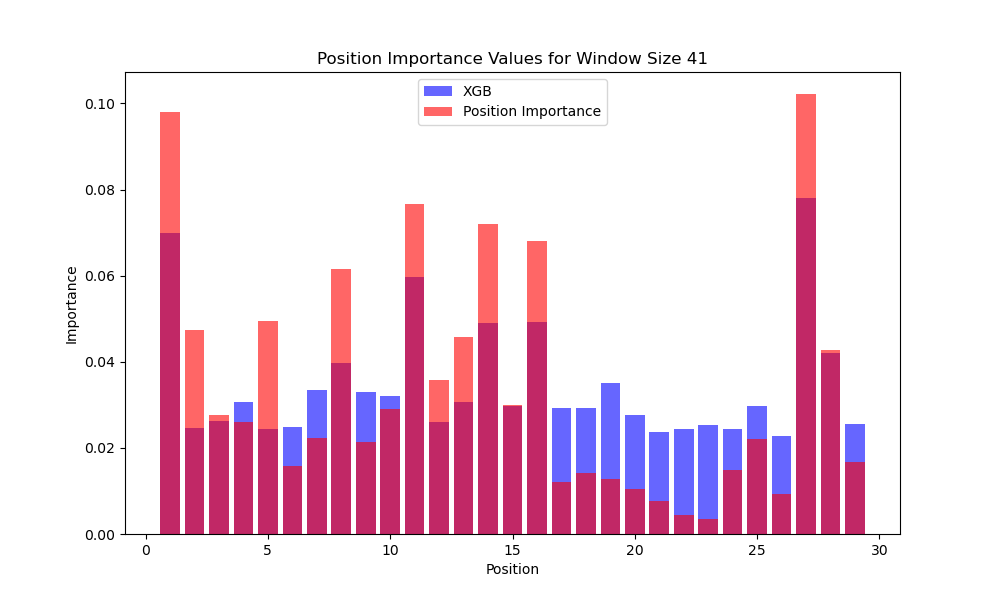

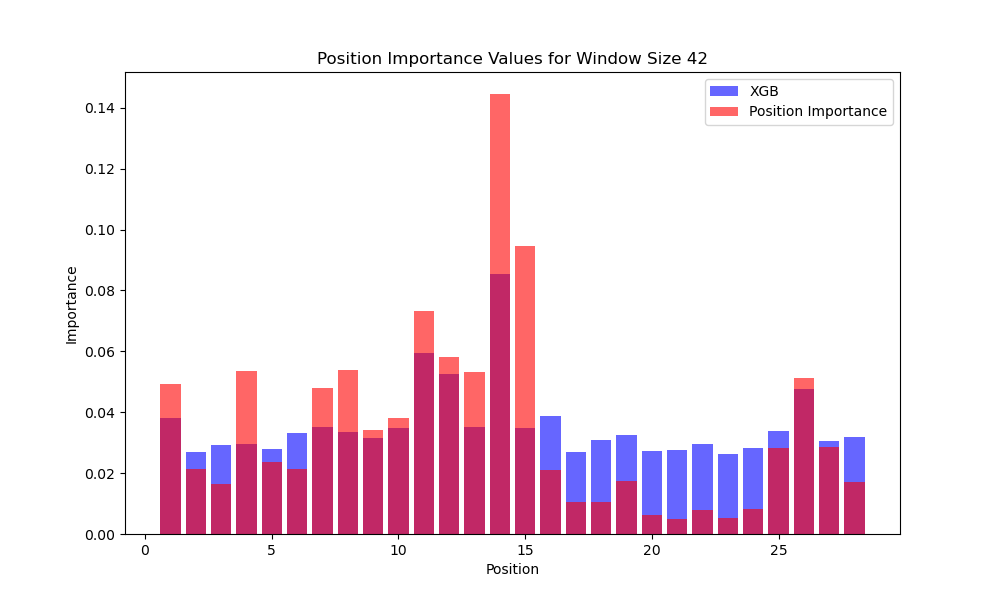

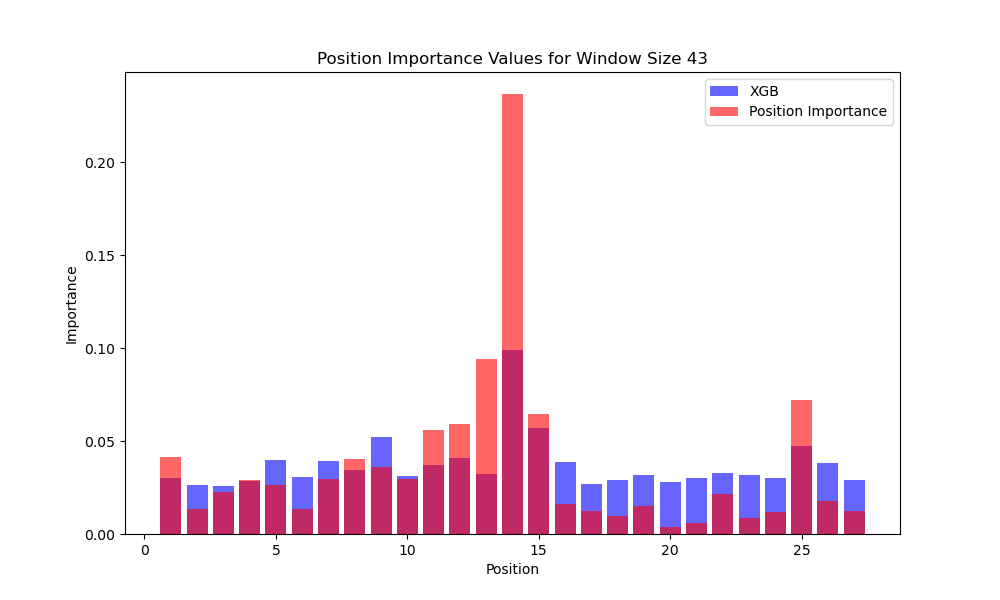

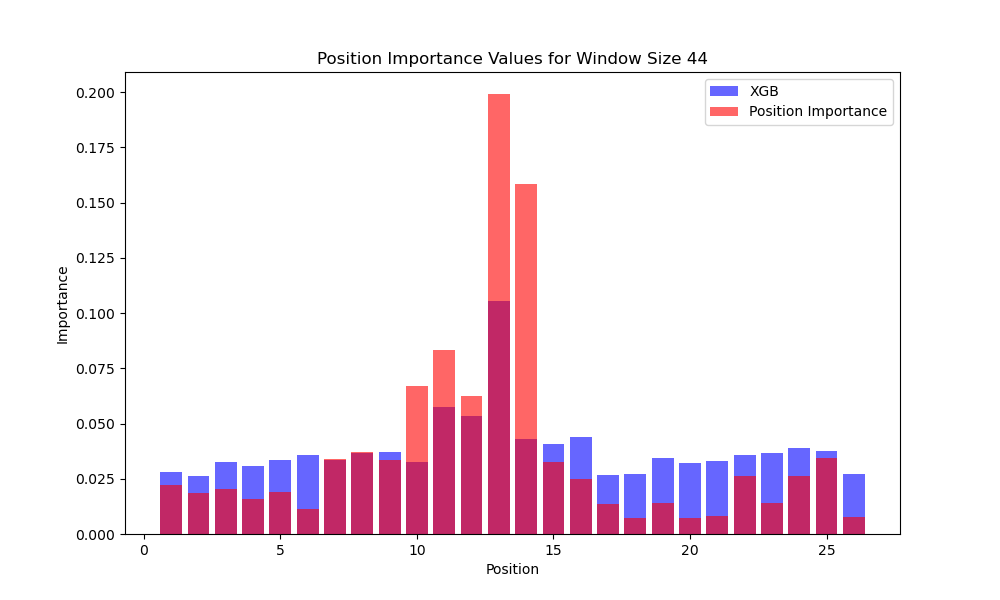

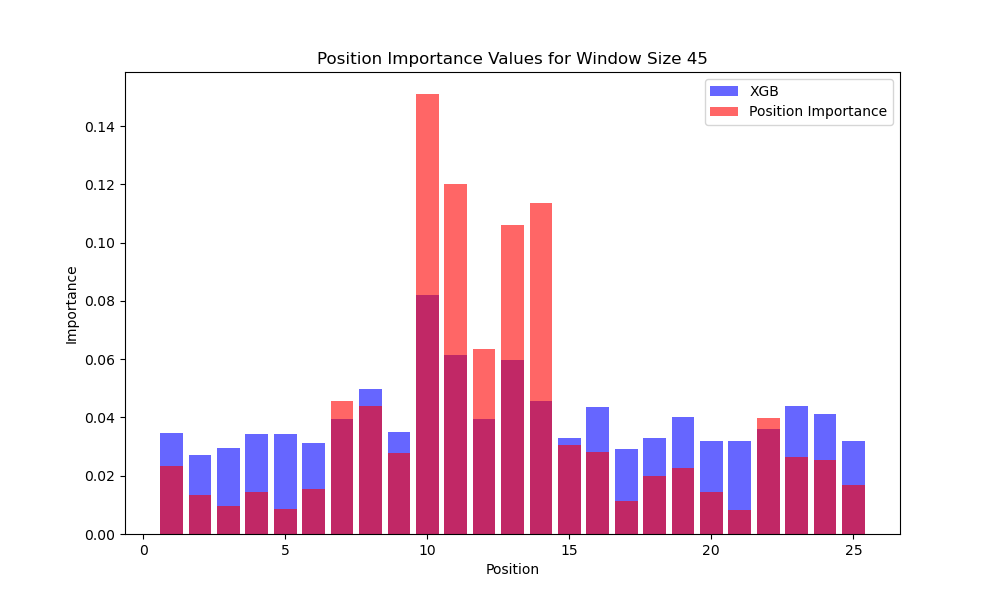

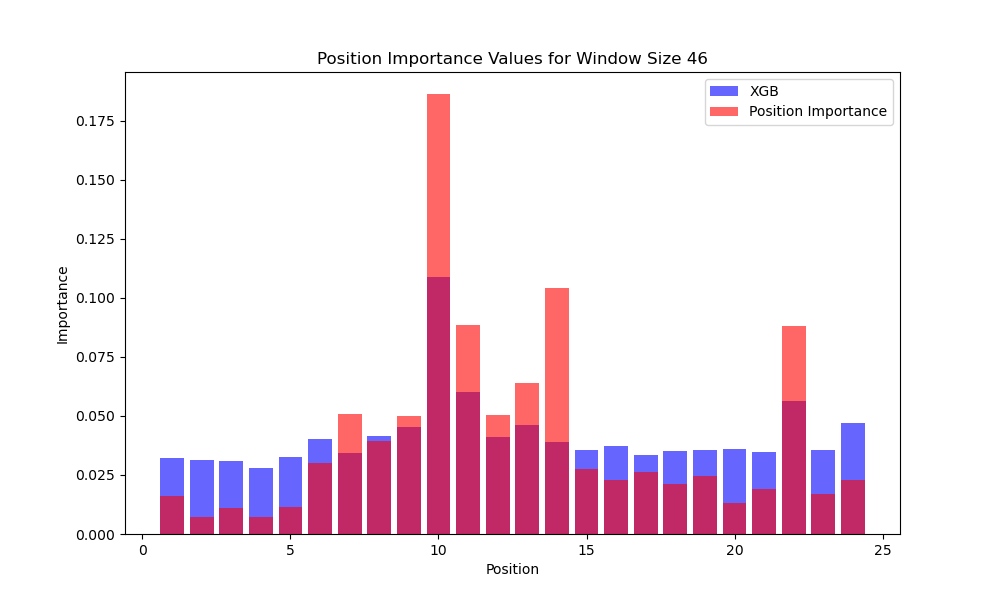

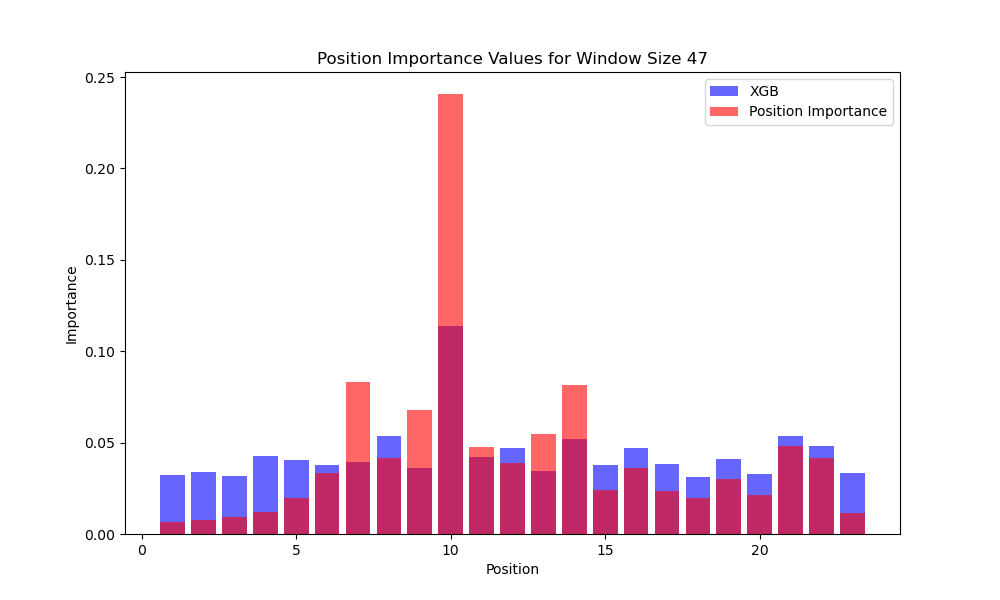

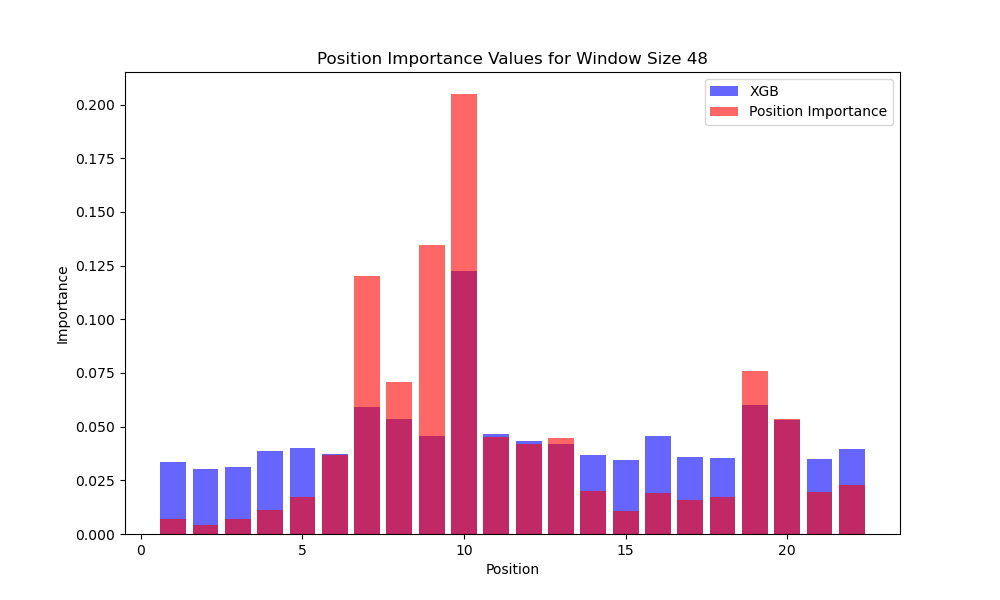

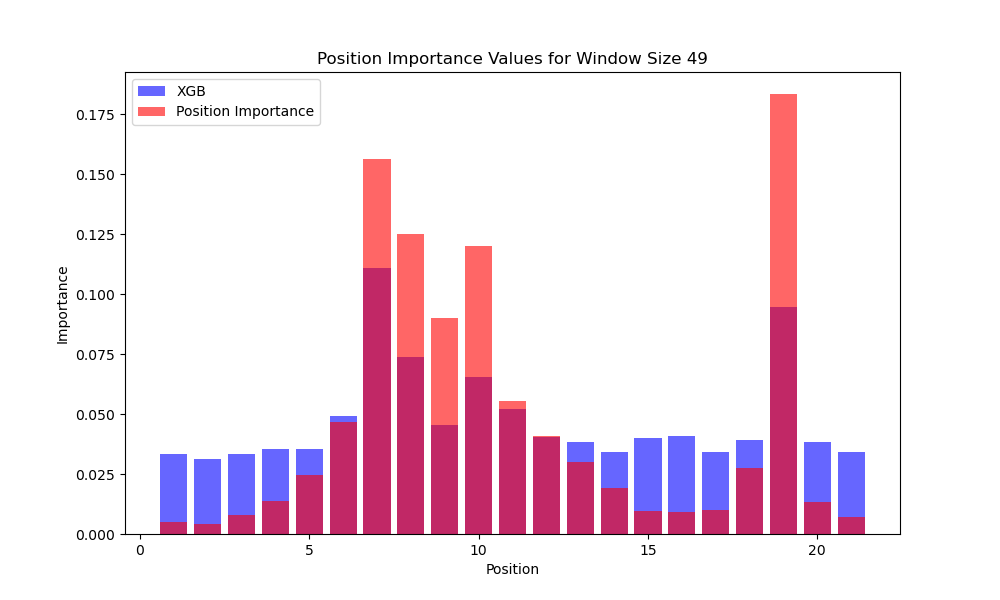

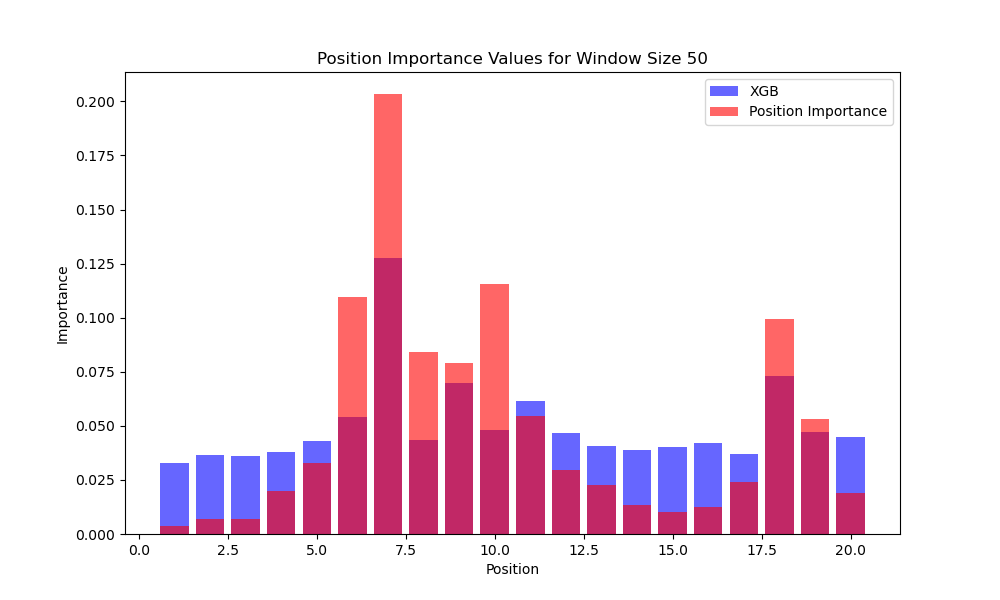

In [14]:
from IPython.display import Image, display
def display_feature_importance_plots(output_folder):
    for window_size in range(2,51):
        image_path = f"{output_folder}/Overlaid_Importance_{window_size}.png"
        display(Image(filename=image_path))
        
display_feature_importance_plots('Overlaid_Importance')